In [229]:
import pandas as pd
import warnings

In [230]:
warnings.filterwarnings("ignore")

In [231]:
df=pd.read_csv(r"C:\Users\PC\Downloads\archive (1)\Airbnb_Open_Data.csv")

# Deleting Redundant Columns


In [232]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [233]:
drop_lower = [
    'id',
    'number of reviews',
    'last review',
    'reviews per month',
    'review rate number',
    'calculated host listings count',
    'availability 365',
    'house rules',
    'license'
]


In [234]:
columns_to_drop = [col for col in df.columns if col.lower() in drop_lower]

In [235]:
df.drop(columns=columns_to_drop, inplace=True)

In [236]:
df.head(2)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,Pet friendly but please confirm with me if the...


In [237]:
df.shape

(102599, 18)

# Renaming Columns


In [238]:
df.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'house_rules'],
      dtype='object')

In [239]:
df.columns=[col.title()for col in df.columns]

In [240]:
df.columns=[col.replace("_"," ").title()for col in df.columns]

In [241]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights',
       'House Rules'],
      dtype='object')



# Dropping Duplicates


In [242]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [243]:
df.drop_duplicates(inplace=True)

In [244]:
df.duplicated().sum()

np.int64(0)

# Removing Missing (NaN) Values


In [245]:
df.isna().sum().sort_values(ascending=False)

House Rules               51842
Country                     532
Host Name                   404
Minimum Nights              400
Host Identity Verified      289
Service Fee                 273
Name                        250
Price                       247
Construction Year           214
Country Code                131
Instant Bookable            105
Cancellation Policy          76
Neighbourhood Group          29
Neighbourhood                16
Lat                           8
Long                          8
Host Id                       0
Room Type                     0
dtype: int64

 MISSING VALUES ANALYSIS 

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [247]:
sns.set(style=("whitegrid"))

TOTAL PERCENTAGE OF NAN

In [248]:
df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100

np.float64(2.9843596560561423)

NAN PERCENTAGE PER COLUMN

In [249]:
Nan_percntage=df.isna().sum()/df.shape[0]*100 
Info_df=pd.DataFrame({"Missing_Values":df.isna().sum(),"Percentage":Nan_percntage})
Info_df=Info_df.sort_values(by=["Percentage","Missing_Values"],ascending=False)
Info_df["Percentage"]=Info_df["Percentage"].round(2)
print("           MISSING VALUES ANALYSIS")
print("_"*40)
print(Info_df)

           MISSING VALUES ANALYSIS
________________________________________
                        Missing_Values  Percentage
House Rules                      51842       50.80
Country                            532        0.52
Host Name                          404        0.40
Minimum Nights                     400        0.39
Host Identity Verified             289        0.28
Service Fee                        273        0.27
Name                               250        0.24
Price                              247        0.24
Construction Year                  214        0.21
Country Code                       131        0.13
Instant Bookable                   105        0.10
Cancellation Policy                 76        0.07
Neighbourhood Group                 29        0.03
Neighbourhood                       16        0.02
Lat                                  8        0.01
Long                                 8        0.01
Host Id                              0        0.00
Room T

MISSING VALUES VISUALIZATION

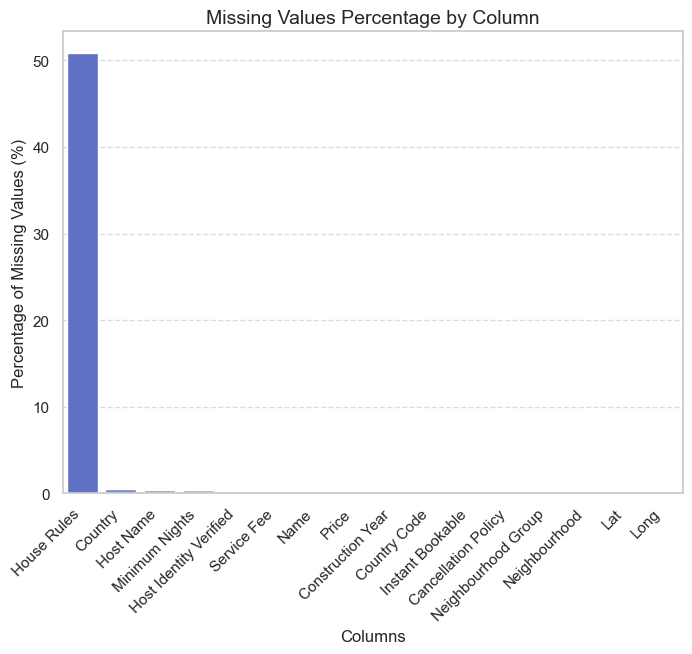

In [250]:
missing_df = Info_df[Info_df["Missing_Values"] > 0]


plt.figure(figsize=(8, 6))


sns.barplot(x=missing_df.index, y=missing_df["Percentage"], palette="coolwarm")


plt.title("Missing Values Percentage by Column", fontsize=14)
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45,ha="right")


plt.grid(axis='y', linestyle='--', alpha=1)



plt.grid(axis='y', alpha=0.7)

plt.show()

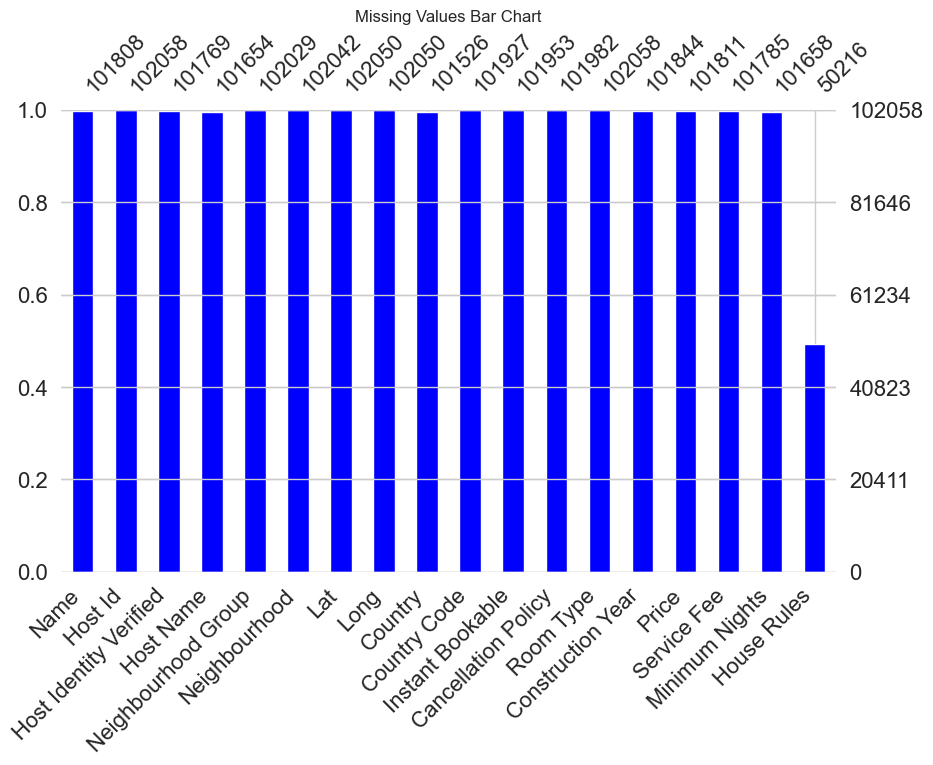

In [251]:
msno.bar(df, color='blue', figsize=(10, 6))
plt.title("Missing Values Bar Chart",fontsize=12)
plt.show()

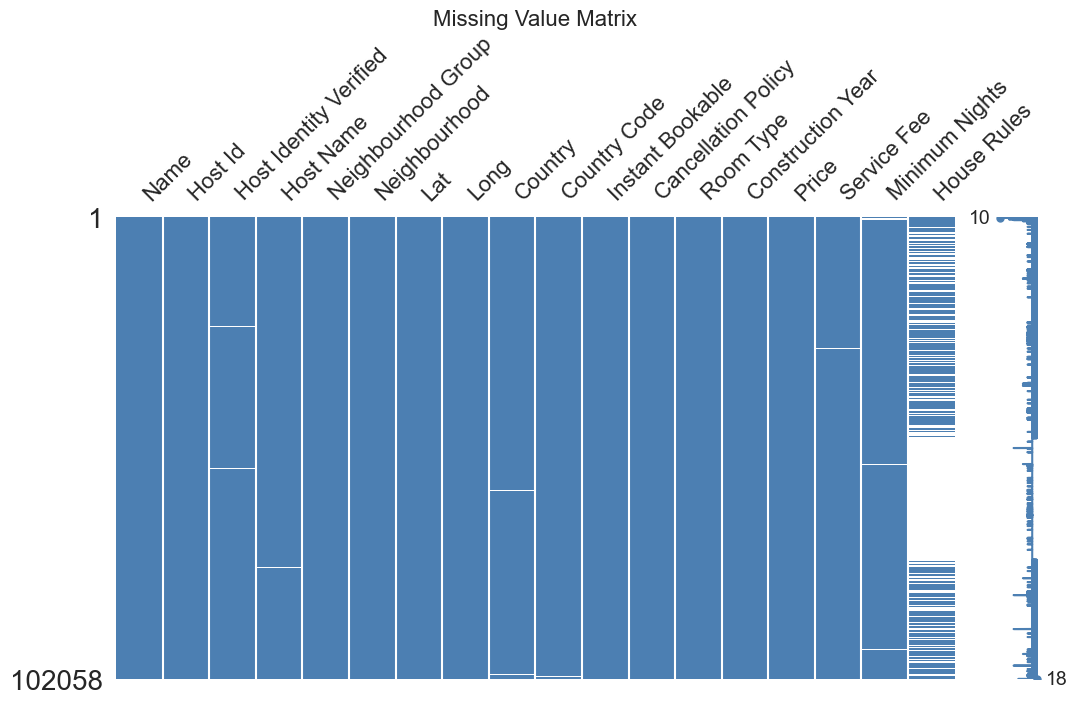

In [252]:
msno.matrix(df, figsize=(12, 6), color=(0.3, 0.5, 0.7))
plt.title('Missing Value Matrix',fontsize=16)
plt.show()

 Fill NaN values in 'NetWorth' column with median
df['NetWorth'].fillna(df['NetWorth'].median(), inplace=True)
 
 Fill NaN values in 'Country' column with mode
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

Drop rows where 'Name' column is NaN
df.dropna(subset=['Name'], inplace=True)


In [253]:
df.dropna(inplace=True)

In [254]:
df.isna().sum().sum()

np.int64(0)

In [255]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,"No smoking, please, and no drugs."
7,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,House Guidelines for our BnB We are delighted ...


# Cleaning Individual Columns

In [256]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,"No smoking, please, and no drugs."
7,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,House Guidelines for our BnB We are delighted ...


In [257]:
df['Host Identity Verified'].value_counts()

Host Identity Verified
verified       24564
unconfirmed    24353
Name: count, dtype: int64

In [258]:
df['Host Identity Verified'].replace({"unconfirmed":"Unverified","verified":"Verified"},inplace=True)

In [259]:

df.head(2)

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,Pet friendly but please confirm with me if the...


In [260]:
df[['Lat', 'Long']].dtypes


Lat     float64
Long    float64
dtype: object

In [261]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [262]:
df["Neighbourhood Group"].value_counts()

Neighbourhood Group
Manhattan        21448
Brooklyn         20127
Queens            5822
Bronx             1106
Staten Island      414
Name: count, dtype: int64

In [263]:
df["Price"]=df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [264]:
df.head(2)

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966,$193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142,$28,30.0,Pet friendly but please confirm with me if the...


In [265]:
#df['Price'] = pd.to_numeric(df['Price'].replace({'\$': '', ',': ''}, regex=True)) best for messy data
df["Service Fee"]=df["Service Fee"].replace({"\$":"",",":""},regex=True).astype(int)

In [266]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966,193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142,28,30.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,Verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204,41,10.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,Verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,577,115,3.0,"No smoking, please, and no drugs."
7,BlissArtsSpace!,90821839709,Unverified,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060,212,45.0,House Guidelines for our BnB We are delighted ...


In [267]:
df["Service Fee"].dtypes

dtype('int64')

In [268]:
df['Construction Year'] = df['Construction Year'].astype('Int64')


In [269]:
df["Construction Year"].head()

0    2020
1    2007
4    2009
5    2013
7    2009
Name: Construction Year, dtype: Int64

# Checking For Additional Transformations 

In [270]:
df["Instant Bookable"].value_counts()

Instant Bookable
False    24532
True     24385
Name: count, dtype: int64

In [271]:
df["Instant Bookable"]=df["Instant Bookable"].apply(lambda x:1 if x==True else 0)

In [272]:
df["Instant Bookable"].head()

0    0
1    0
4    0
5    1
7    0
Name: Instant Bookable, dtype: int64

In [273]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [274]:
df["Cancellation Policy"]=df["Cancellation Policy"].apply(lambda x: 1 if x=='flexible' else(2 if x=='moderate' else 3))

In [275]:
df["Cancellation Policy"].head(3)

0    3
1    2
4    2
Name: Cancellation Policy, dtype: int64

In [276]:
df['Host Identity Verified'].unique()

array(['Unverified', 'Verified'], dtype=object)

In [277]:
df['Host Identity Verified']=df['Host Identity Verified'].apply(lambda x:1 if x=="Unverified" else 0)

In [278]:
df.describe(include="object").columns

Index(['Name', 'Host Name', 'Neighbourhood Group', 'Neighbourhood', 'Country',
       'Country Code', 'Room Type', 'House Rules'],
      dtype='object')

In [279]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights,House Rules
0,Clean & quiet apt home by the park,80014485718,1,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,3,Private room,2020,966,193,10.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,0,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,2,Entire home/apt,2007,142,28,30.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,0,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,2,Entire home/apt,2009,204,41,10.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,0,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,1,Entire home/apt,2013,577,115,3.0,"No smoking, please, and no drugs."
7,BlissArtsSpace!,90821839709,1,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,2,Private room,2009,1060,212,45.0,House Guidelines for our BnB We are delighted ...


In [280]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')


In [281]:
df.to_csv(r"C:\Users\PC\Desktop\Data Explatory\Airbnb_Open_Data.csv", index=False)

# UNIVARIET ANALYSIS

In [282]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights',
       'House Rules'],
      dtype='object')

In [283]:
categorical_cols=['Host Identity Verified', 'Neighbourhood Group','Instant Bookable','Room Type']

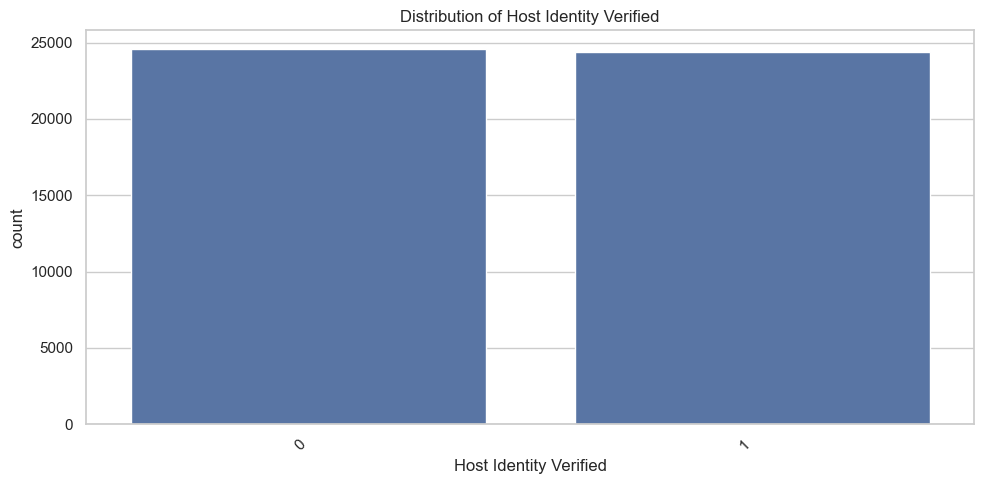

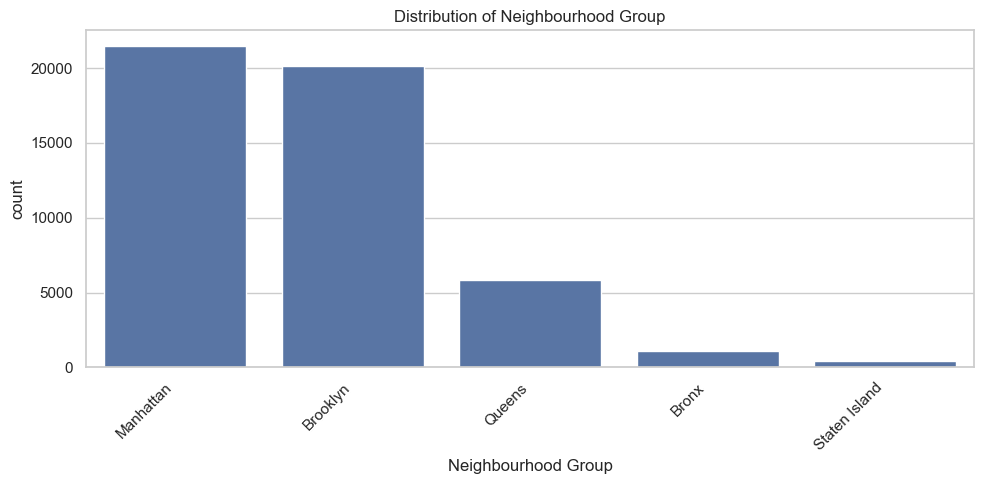

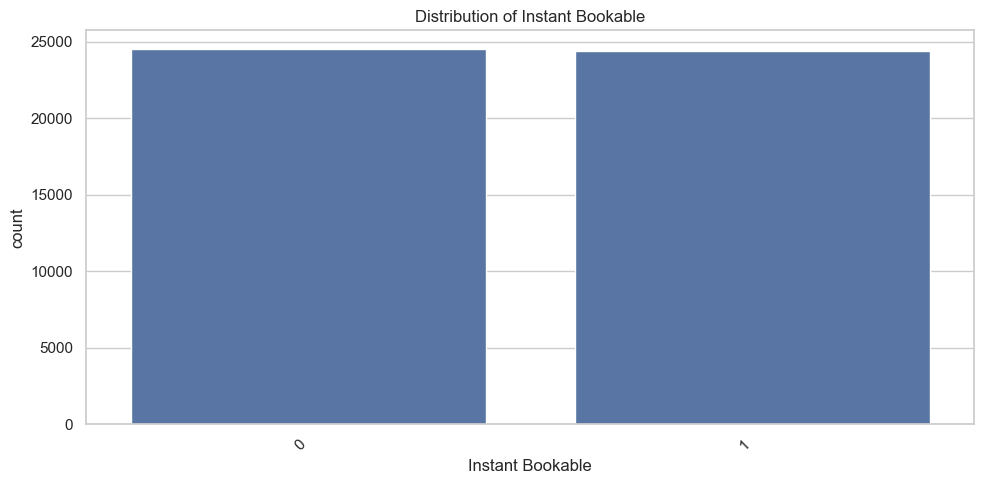

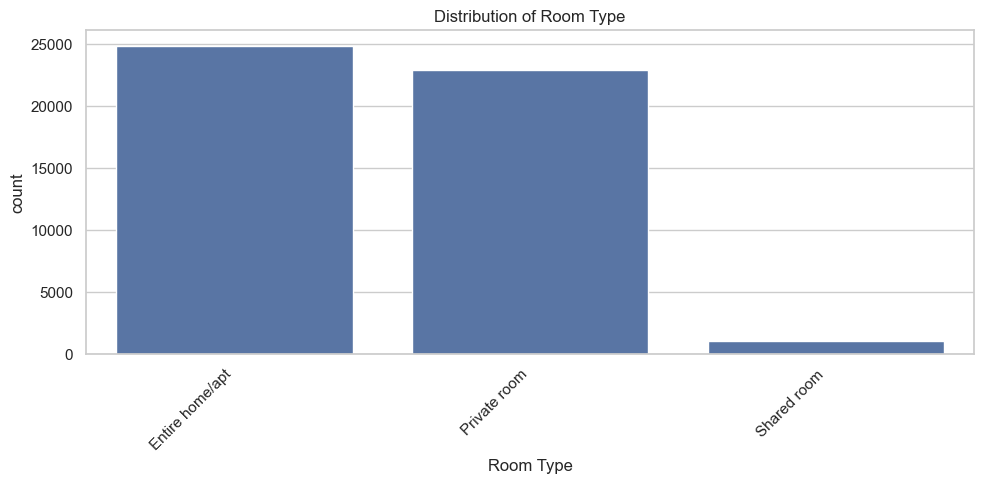

In [284]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # rotate labels if needed
    plt.tight_layout()
    plt.show()

In [285]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights',
       'House Rules'],
      dtype='object')

In [286]:
numerical_cols=['Construction Year', 'Price', 'Service Fee']

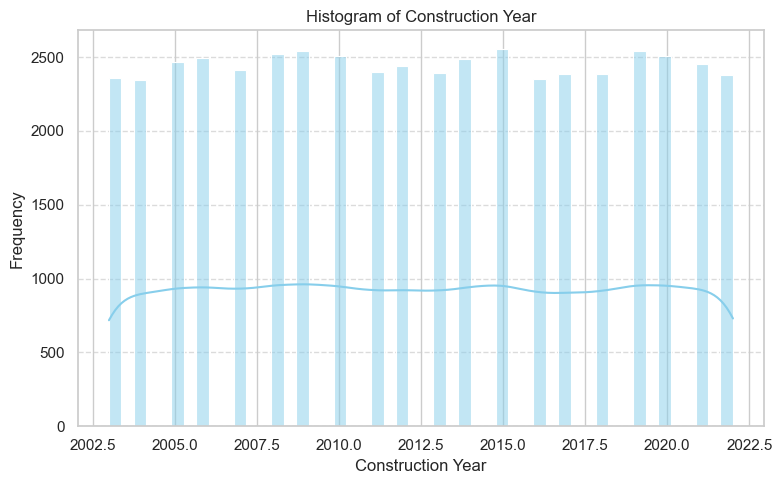

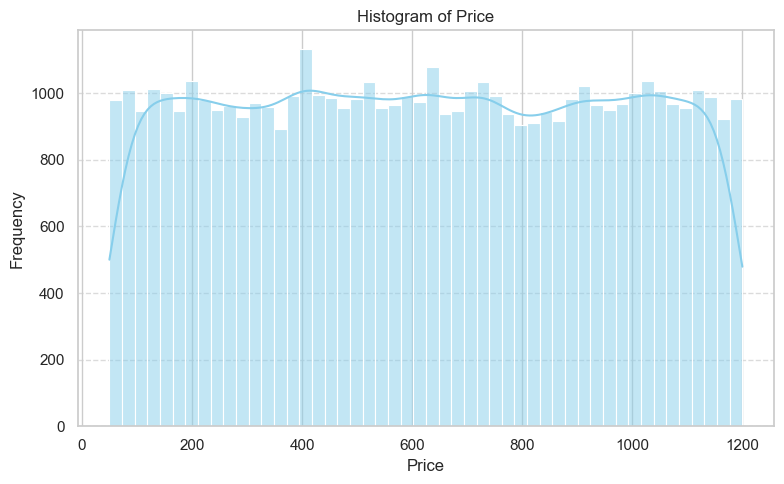

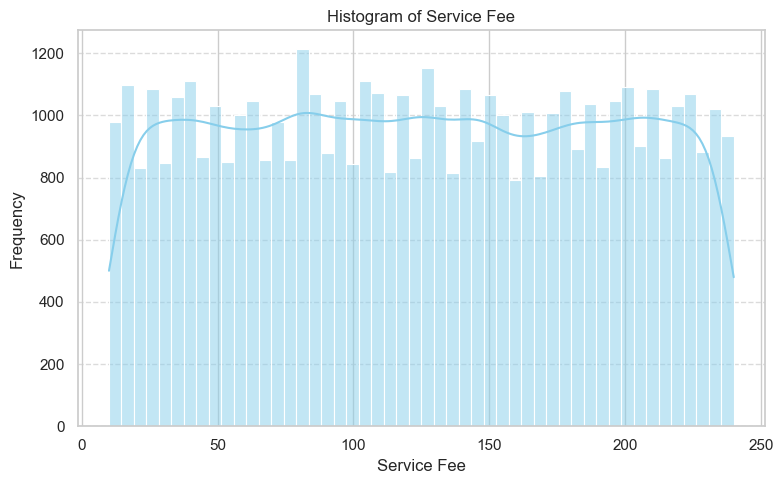

In [287]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# BIVARIET ANALYSIS

We'll analyze relationships between variables in three categories:
1. Numerical vs Numerical: Using correlation and scatter plots
2. Categorical vs Numerical: Using box plots and violin plots
3. Categorical vs Categorical: Using crosstabs and stacked bar charts

First, let's examine correlations between numerical variables.

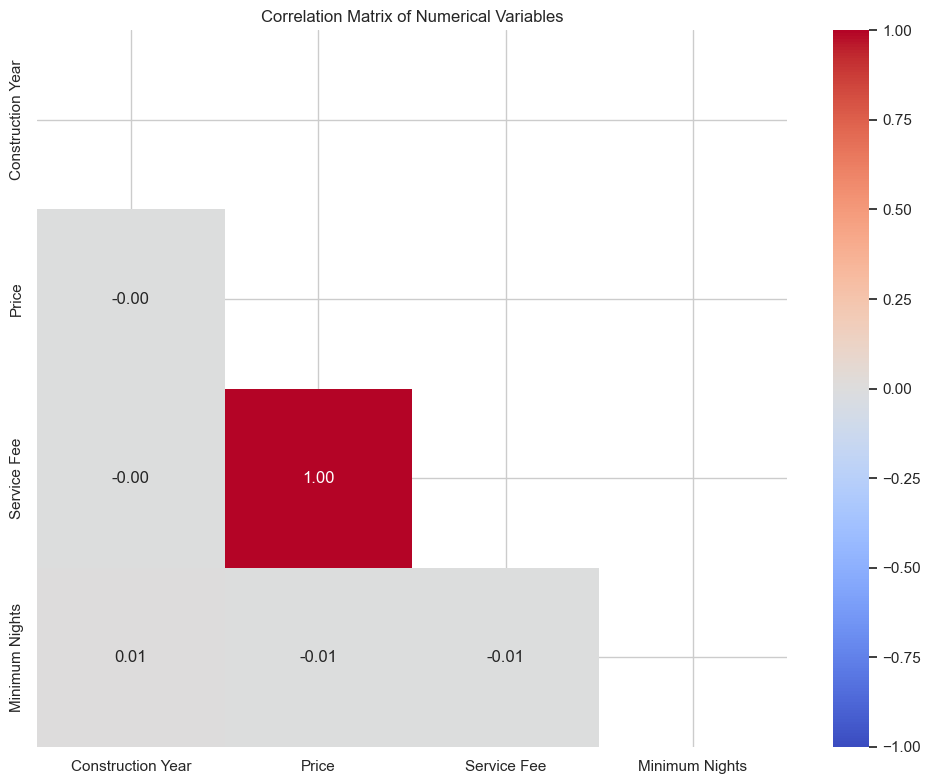


Significant correlations (|r| > 0.1):
Price vs Service Fee: 1.000


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

numerical_cols = ['Construction Year', 'Price', 'Service Fee', 'Minimum Nights']


plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("\nSignificant correlations (|r| > 0.1):")
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        r = corr.iloc[i,j]
        if abs(r) > 0.1:
            print(f"{numerical_cols[i]} vs {numerical_cols[j]}: {r:.3f}")

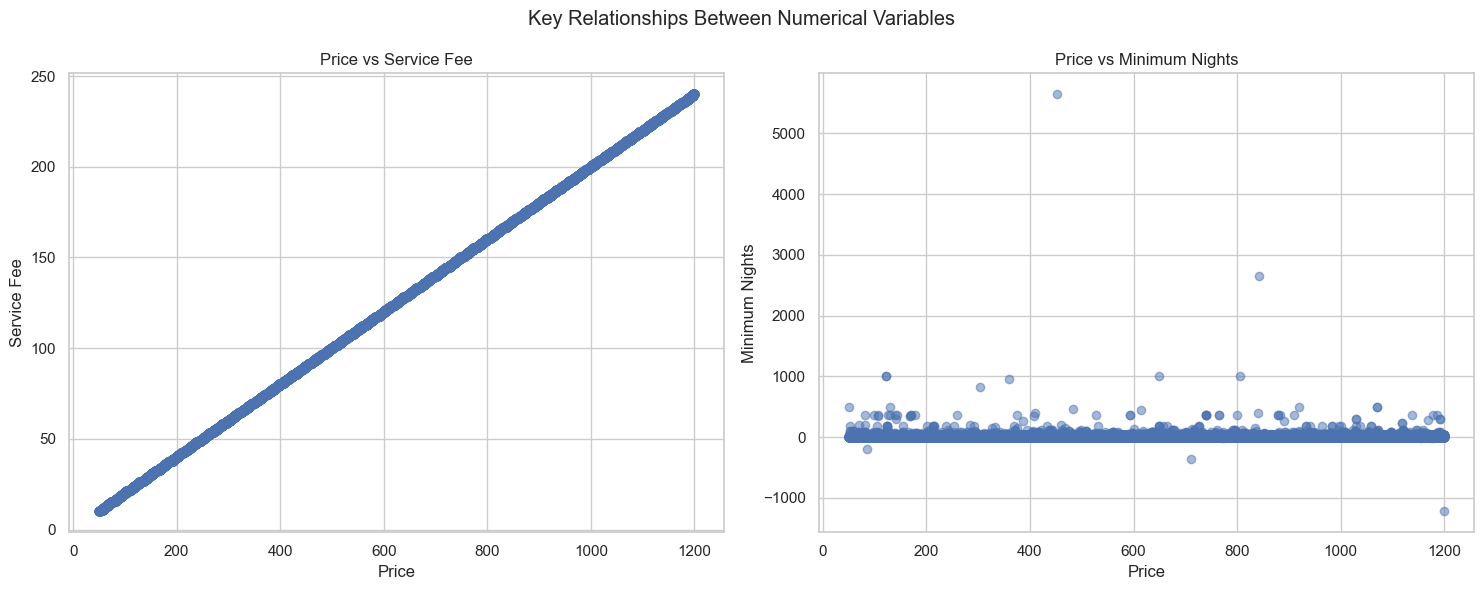

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Key Relationships Between Numerical Variables')


sns.regplot(data=df, x='Price', y='Service Fee', ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('Price vs Service Fee')


sns.regplot(data=df, x='Price', y='Minimum Nights', ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('Price vs Minimum Nights')

plt.tight_layout()
plt.show()

# Categorical vs Numerical Analysis


Mean Prices by Host Identity Verified:
Host Identity Verified
0    621.545025
1    625.476779
Name: Price, dtype: float64
ANOVA test p-value: 0.1904

Mean Prices by Neighbourhood Group:
Neighbourhood Group
Bronx            613.112116
Brooklyn         623.347642
Manhattan        623.823433
Queens           624.281862
Staten Island    631.193237
Name: Price, dtype: float64
ANOVA test p-value: 0.8509

Mean Prices by Neighbourhood Group:
Neighbourhood Group
Bronx            613.112116
Brooklyn         623.347642
Manhattan        623.823433
Queens           624.281862
Staten Island    631.193237
Name: Price, dtype: float64
ANOVA test p-value: 0.8509

Mean Prices by Room Type:
Room Type
Entire home/apt    623.547059
Private room       622.209091
Shared room        649.544211
Name: Price, dtype: float64
ANOVA test p-value: 0.0288

Mean Prices by Room Type:
Room Type
Entire home/apt    623.547059
Private room       622.209091
Shared room        649.544211
Name: Price, dtype: float64
ANOVA tes

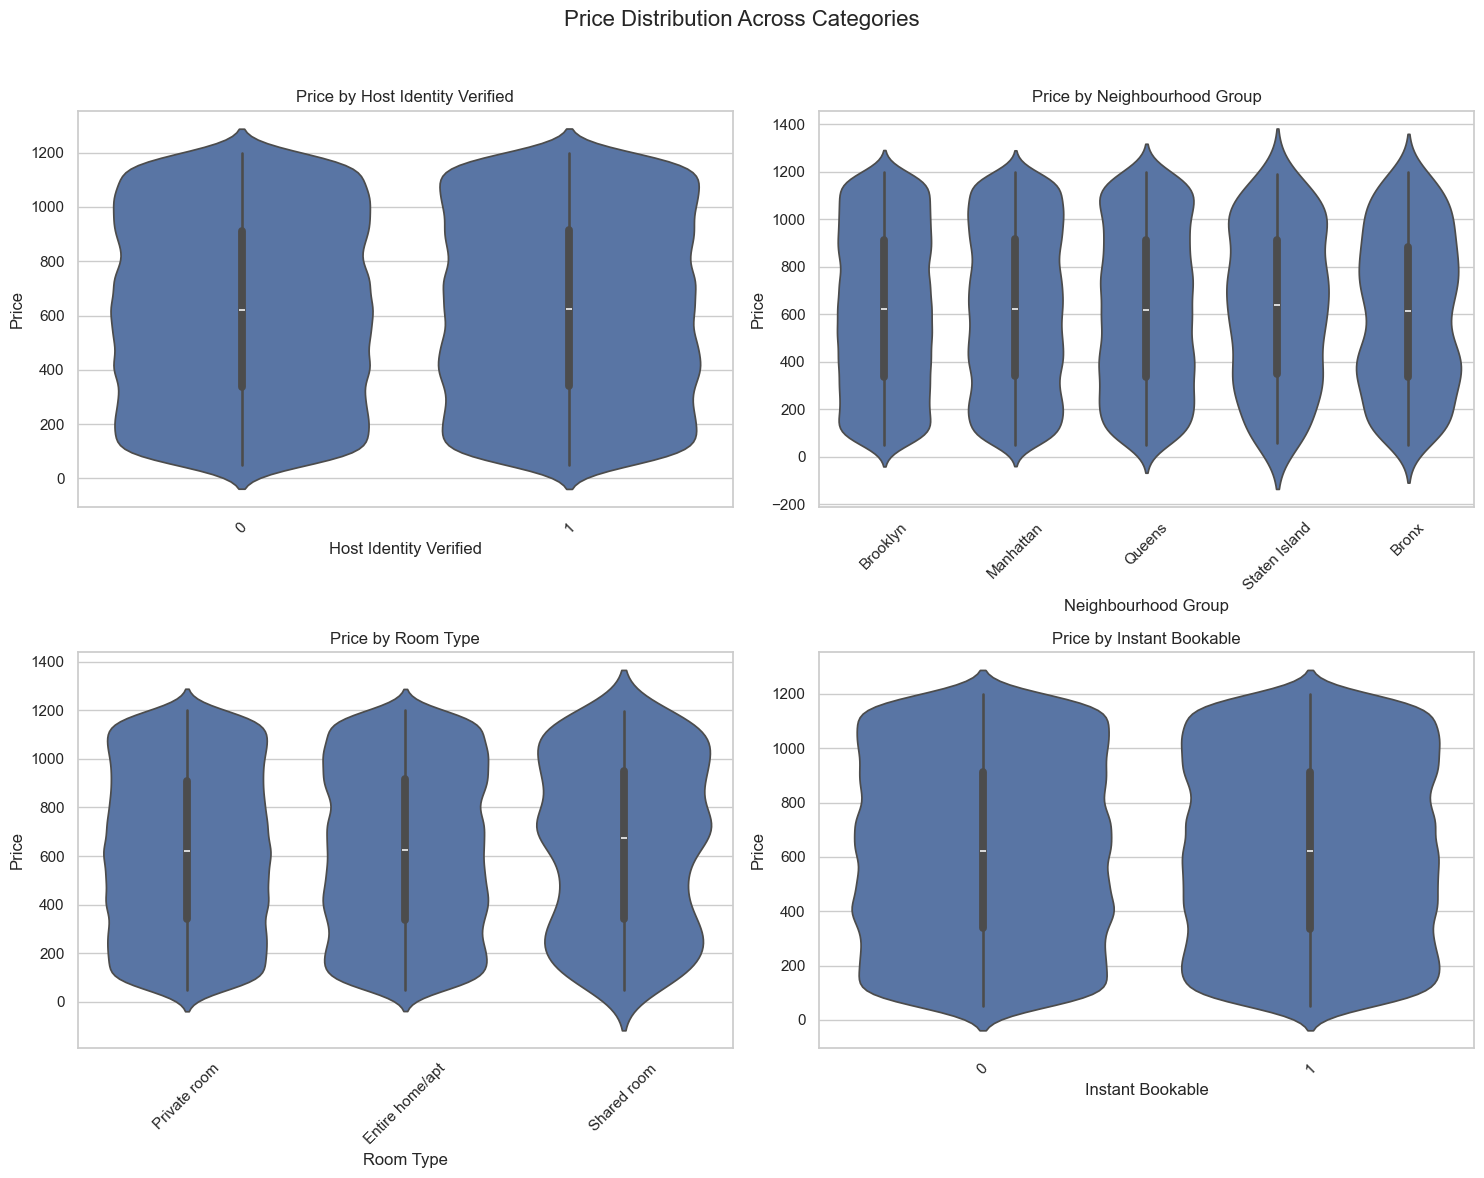

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


cat_price_cols = ['Host Identity Verified', 'Neighbourhood Group', 'Room Type', 'Instant Bookable']


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price Distribution Across Categories', fontsize=16)


axes = axes.flatten()

for idx, cat_col in enumerate(cat_price_cols):
    
    sns.violinplot(data=df, x=cat_col, y='Price', ax=axes[idx], inner='box')
    axes[idx].set_title(f'Price by {cat_col}')
    axes[idx].tick_params(axis='x', rotation=45)
    

    means = df.groupby(cat_col)['Price'].mean()
    print(f"\nMean Prices by {cat_col}:")
    print(means)
    
    # Perform ANOVA test (only if >1 category exists)
    categories = df[cat_col].dropna().unique()
    if len(categories) > 1:
        price_groups = [df[df[cat_col] == cat]['Price'] for cat in categories]
        f_stat, p_val = stats.f_oneway(*price_groups)
        print(f"ANOVA test p-value: {p_val:.4f}")
    else:
        print("ANOVA test skipped (not enough categories)")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


# Categorical vs Categorical Analysis

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


cat_columns = ['Host Identity Verified', 'Neighbourhood Group', 'Room Type', 'Instant Bookable']


chi_square_results = {}


for i in range(len(cat_columns)):
    for j in range(i+1, len(cat_columns)):
        col1 = cat_columns[i]
        col2 = cat_columns[j]
        
        contingency = pd.crosstab(df[col1].astype(str), df[col2].astype(str))
        
        if contingency.size == 0 or contingency.values.sum() == 0:
            chi_square_results[(col1, col2)] = {'chi2': None, 'p_value': None, 'degrees_of_freedom': None}
            continue
        try:
            chi2, p_value, dof, expected = chi2_contingency(contingency)
        except Exception as e:
            
            chi2, p_value, dof = None, None, None
        chi_square_results[(col1, col2)] = {
            'chi2': chi2,
            'p_value': p_value,
            'degrees_of_freedom': dof
        }


print('Chi-square Test Results for Categorical Variables:\n')
for pair, results in chi_square_results.items():
    print(f'Variables: {pair[0]} vs {pair[1]}')
    if results['chi2'] is None:
        print('  Test could not be performed (empty or invalid contingency table)')
    else:
        print(f'  Chi-square statistic: {results['chi2']:.2f}')
        print(f'  p-value: {results['p_value']:.4f}')
        print(f'  Degrees of freedom: {results['degrees_of_freedom']}')
        print('  Association:', 'Significant' if results['p_value'] < 0.05 else 'Not significant')
    print('-' * 80)

Chi-square Test Results for Categorical Variables:

Variables: Host Identity Verified vs Neighbourhood Group
  Chi-square statistic: 0.73
  p-value: 0.9471
  Degrees of freedom: 4
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Host Identity Verified vs Room Type
  Chi-square statistic: 0.89
  p-value: 0.6412
  Degrees of freedom: 2
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Host Identity Verified vs Instant Bookable
  Chi-square statistic: 0.10
  p-value: 0.7504
  Degrees of freedom: 1
  Association: Not significant
--------------------------------------------------------------------------------
Variables: Neighbourhood Group vs Room Type
  Chi-square statistic: 1507.01
  p-value: 0.0000
  Degrees of freedom: 8
  Association: Significant
--------------------------------------------------------------------------------
Variables: Neig

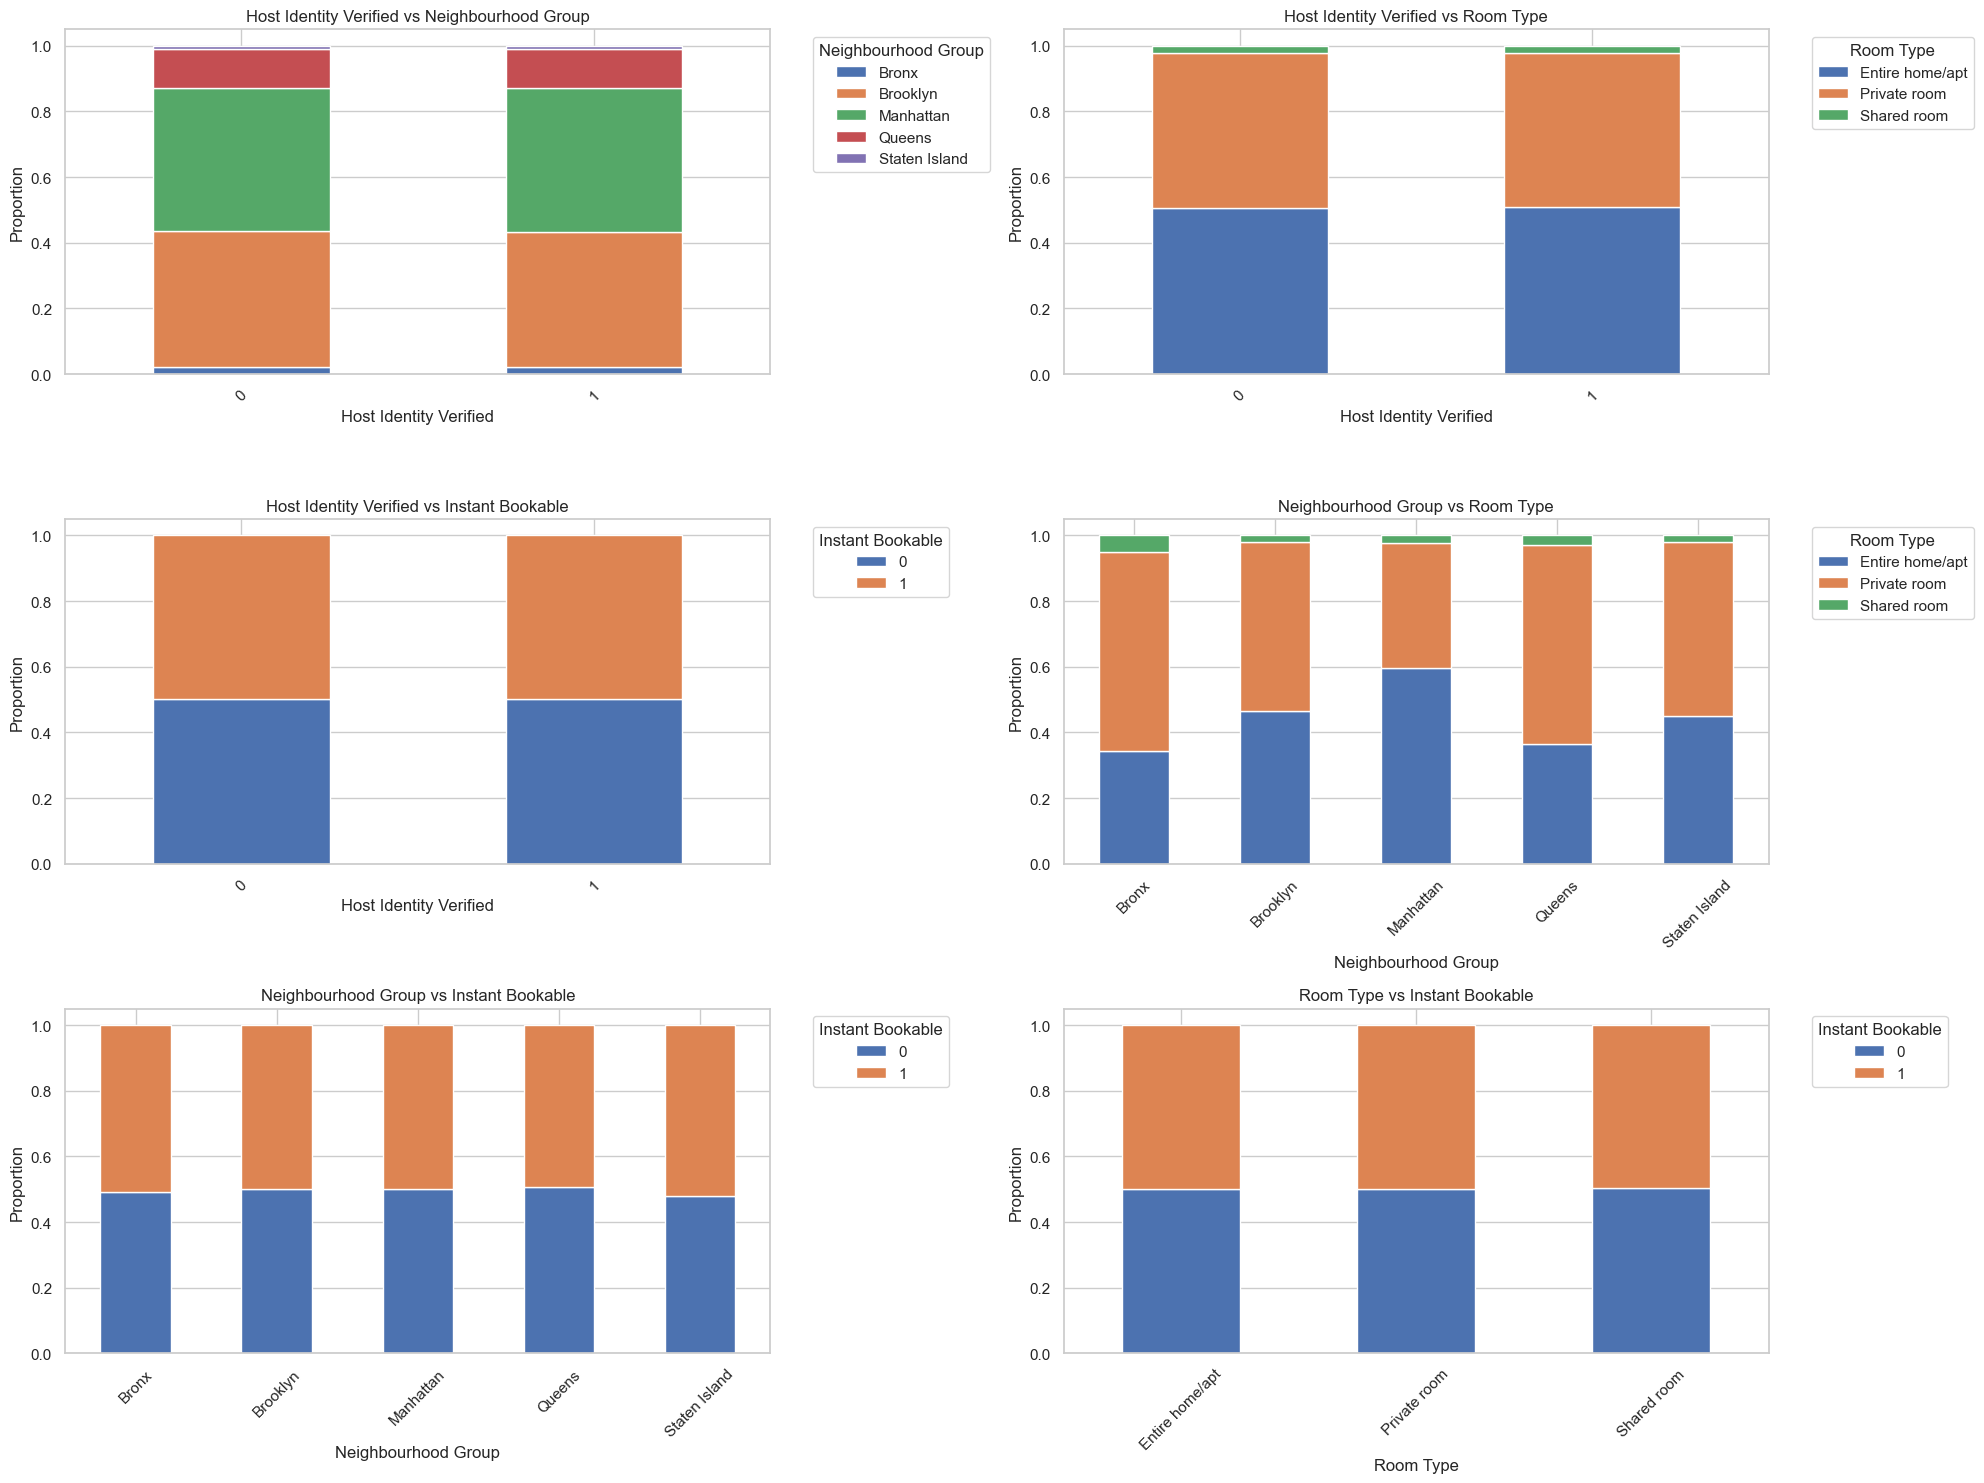

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))


plot_counter = 1

for i in range(len(cat_columns)):
    for j in range(i+1, len(cat_columns)):
        col1 = cat_columns[i]
        col2 = cat_columns[j]
        
        
        ax = plt.subplot(3, 2, plot_counter)
        
        
        prop_data = pd.crosstab(df[col1].astype(str), df[col2].astype(str), normalize='index')
        
        
        prop_data.plot(kind='bar', stacked=True, ax=ax)
        
        ax.set_title(f'{col1} vs {col2}')
        ax.set_xlabel(col1)
        ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title=col2, bbox_to_anchor=(1.05, 1))
        
        plot_counter += 1

plt.tight_layout()
plt.show()

# Multivariate Analysis



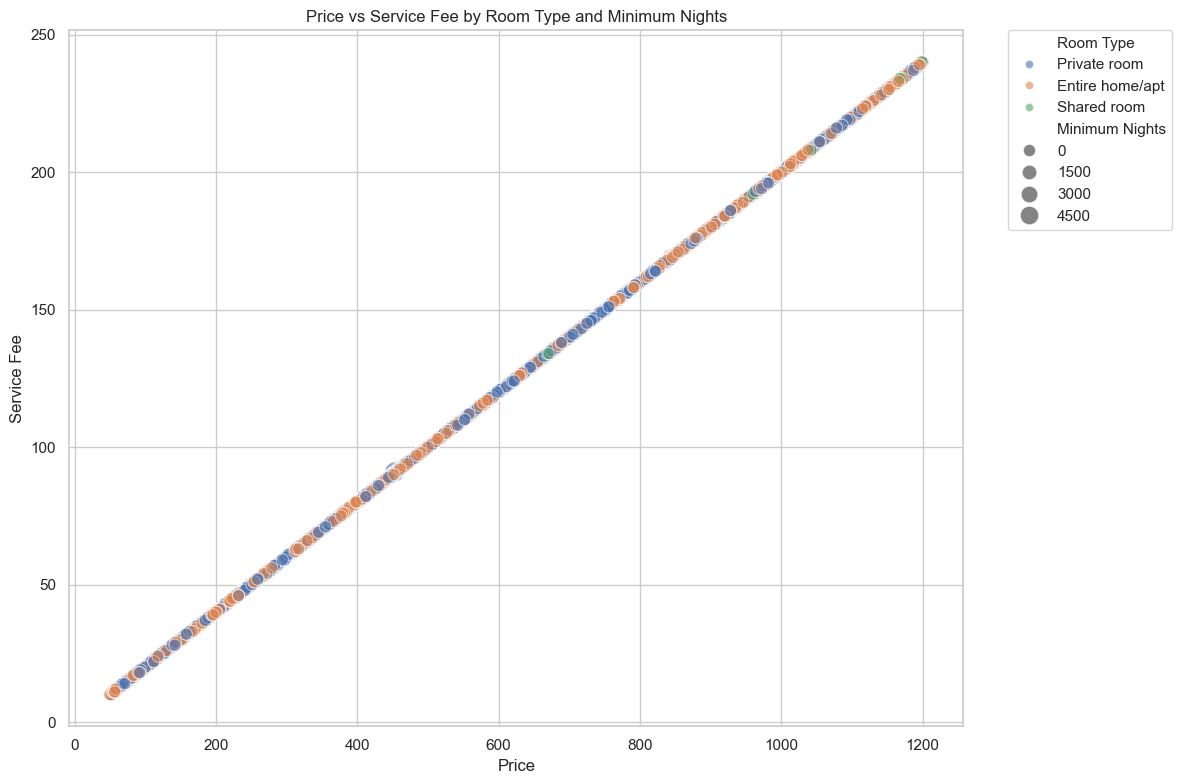

In [ ]:

plt.figure(figsize=(12, 8))


sns.scatterplot(data=df, x='Price', y='Service Fee', hue='Room Type', 
                size='Minimum Nights', sizes=(50, 200), alpha=0.6)

plt.title('Price vs Service Fee by Room Type and Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Service Fee')

plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

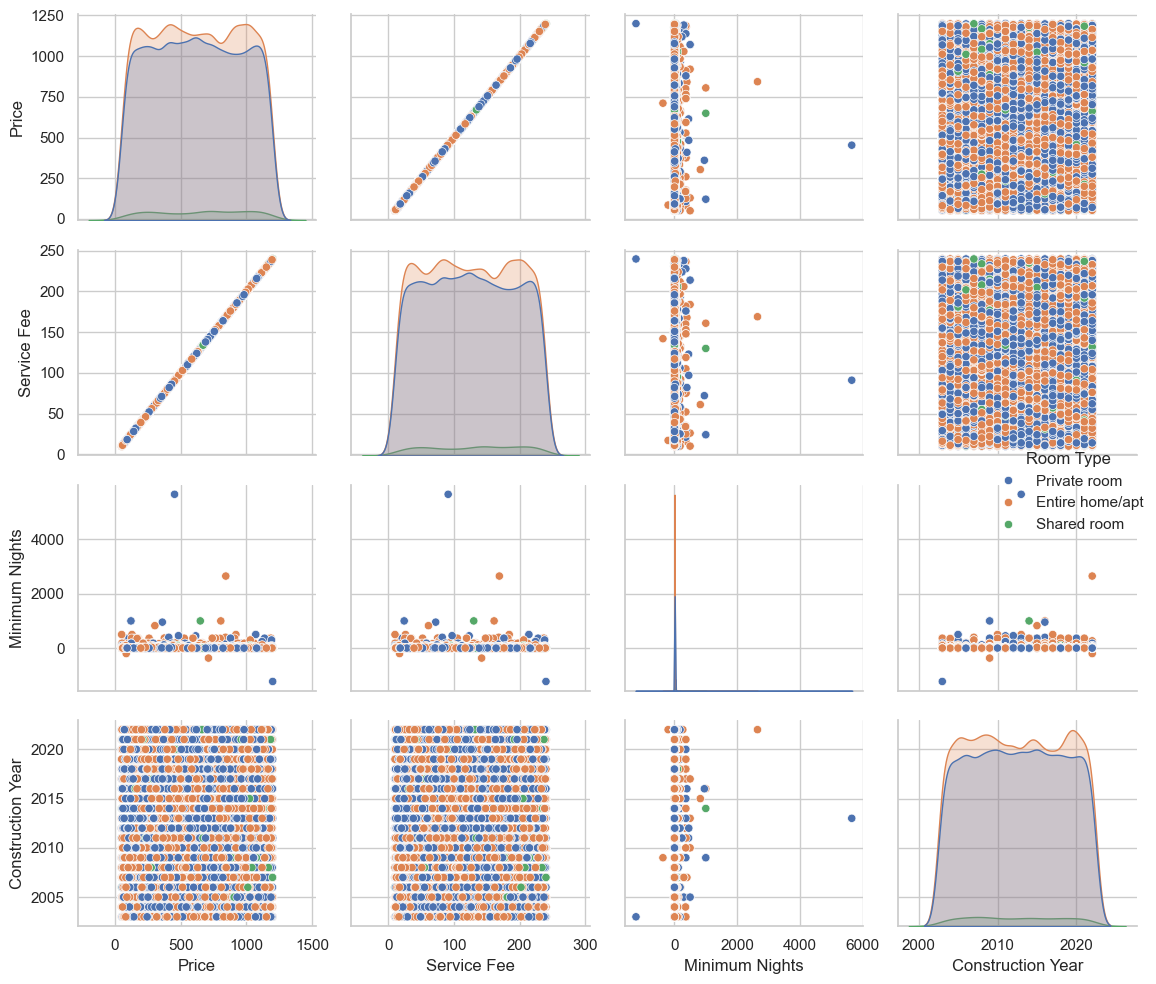

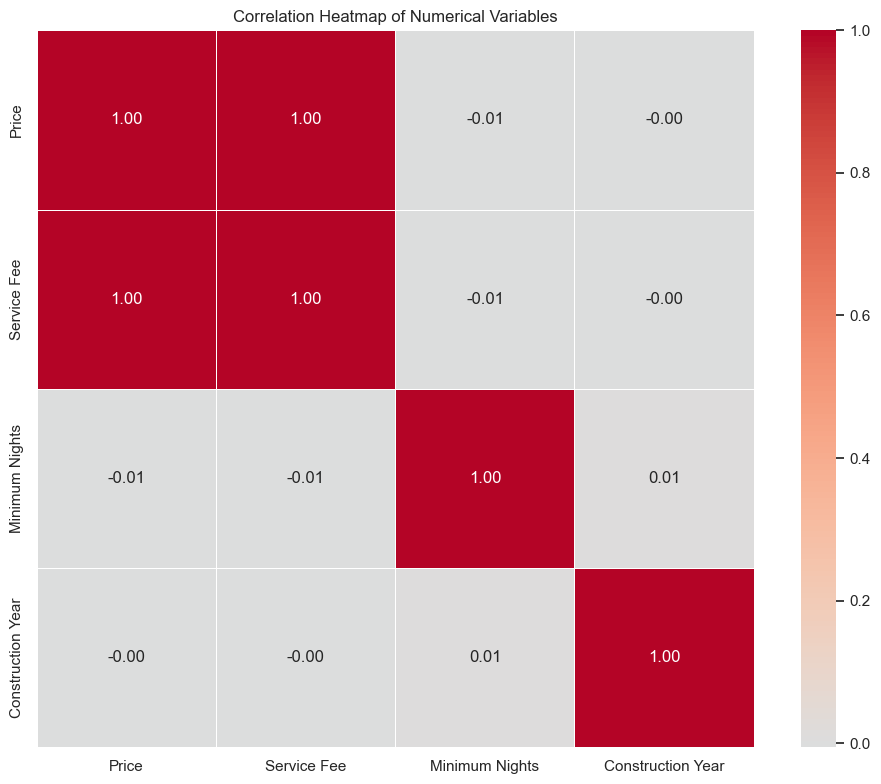

In [ ]:

numerical_cols = ['Price', 'Service Fee', 'Minimum Nights', 'Construction Year']
sns.pairplot(df[numerical_cols + ['Room Type']], hue='Room Type', diag_kind='kde')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

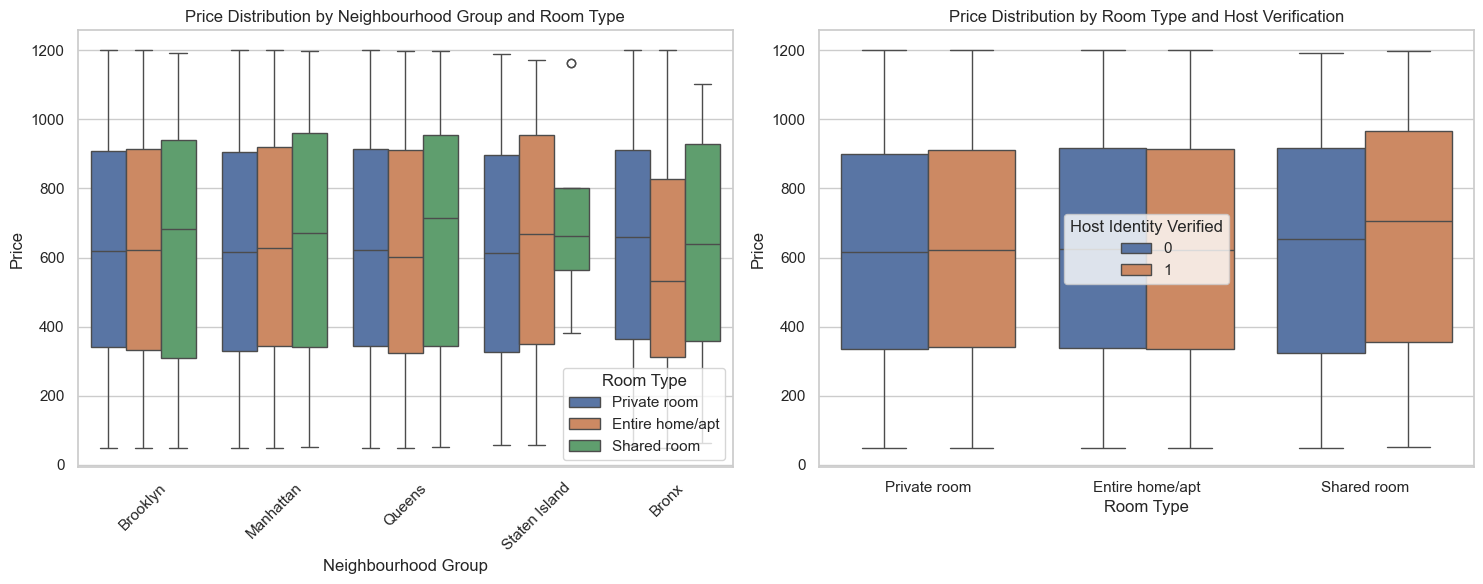


Summary Statistics for Price by Neighbourhood Group and Room Type:
                                       mean  median     std  count
Neighbourhood Group Room Type                                     
Bronx               Entire home/apt  569.76   532.0  323.29    381
                    Private room     637.04   660.0  324.11    670
                    Shared room      621.91   638.0  313.09     55
Brooklyn            Entire home/apt  623.57   621.0  332.81   9369
                    Private room     622.52   620.0  331.02  10385
                    Shared room      640.85   684.0  345.08    373
Manhattan           Entire home/apt  625.87   629.0  332.49  12814
                    Private room     618.62   615.0  330.75   8147
                    Shared room      656.90   671.0  337.85    487
Queens              Entire home/apt  616.90   603.0  337.29   2123
                    Private room     627.29   623.0  332.23   3525
                    Shared room      653.32   713.5  341.72  

In [ ]:

plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Neighbourhood Group', y='Price', hue='Room Type')
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighbourhood Group and Room Type')


plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Room Type', y='Price', hue='Host Identity Verified')
plt.title('Price Distribution by Room Type and Host Verification')

plt.tight_layout()
plt.show()


summary_stats = df.groupby(['Neighbourhood Group', 'Room Type'])['Price'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nSummary Statistics for Price by Neighbourhood Group and Room Type:")
print(summary_stats)

# Analysis Summary

1. **Categorical Relationships**:
   - Chi-square tests reveal significant associations between categorical variables
   - Stacked bar plots show the distribution patterns between pairs of categorical variables

2. **Price and Service Fee Analysis**:
   - Strong positive correlation between Price and Service Fee
   - Different room types show distinct pricing patterns
   - Minimum nights requirement varies across price ranges

3. **Geographical and Property Type Insights**:
   - Price distributions vary significantly across neighborhood groups
   - Room types have different price ranges in different neighborhoods
   - Host verification status shows some influence on pricing

4. **Multivariate Patterns**:
   - The pair plot reveals complex relationships between numerical variables
   - Room type is a key factor influencing price and service fee relationships
   - Construction year shows varied relationships with other variables

This analysis provides valuable insights for understanding the AirBnb market dynamics and pricing patterns across different categories and locations.

In [ ]:

from IPython.display import display
print('Sample contingency tables (first 3 pairs):')
pairs = list(chi_square_results.keys())[:3]
for (col1, col2) in pairs:
    print(f"\nContingency: {col1} vs {col2}")
    display(pd.crosstab(df[col1].astype(str), df[col2].astype(str)).head())

print('\nChi-square results summary:')
for pair, res in chi_square_results.items():
    print(f"{pair[0]} vs {pair[1]}: p-value={res['p_value']}")


Sample contingency tables (first 3 pairs):

Contingency: Host Identity Verified vs Neighbourhood Group


Neighbourhood Group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Host Identity Verified,,,,,
0,554,10139,10729,2937,205
1,552,9988,10719,2885,209



Contingency: Host Identity Verified vs Room Type


Room Type,Entire home/apt,Private room,Shared room
Host Identity Verified,,,
0,12452,11549,563
1,12421,11398,534



Contingency: Host Identity Verified vs Instant Bookable


Instant Bookable,0,1
Host Identity Verified,,
0,12337,12227
1,12195,12158



Chi-square results summary:
Host Identity Verified vs Neighbourhood Group: p-value=0.9470570342013951
Host Identity Verified vs Room Type: p-value=0.6412110947058276
Host Identity Verified vs Instant Bookable: p-value=0.7503675053636744
Neighbourhood Group vs Room Type: p-value=0.0
Neighbourhood Group vs Instant Bookable: p-value=0.7215867566674131
Room Type vs Instant Bookable: p-value=0.9599728609636725
